# Week1授業課題1 曽呂利新左衛門問題

## 【問題1】100日目の米粒の数
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [46]:
# 1日目の米粒
kome = 1

# 累積の米粒の数
now_kome = 1

# 日数
count_day = 100

# 日別リスト
list_kome = [1]

# 累積リスト
list_now_kome = [1]

for i in range(1,count_day):
    kome = kome * 2
    list_kome.append(kome)
    now_kome += kome
    list_now_kome.append(now_kome)

print("{}日目にもらう米の数 : {} 個".format(count_day, kome))
print("{}日目までに累計でもらう米の数 : {} 個".format(count_day, now_kome))
# print(list_kome)
#print(list_now_kome)

100日目にもらう米の数 : 633825300114114700748351602688 個
100日目までに累計でもらう米の数 : 1267650600228229401496703205375 個


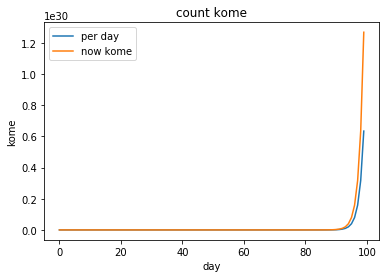

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("count kome" )
plt.xlabel("day")
plt.ylabel("kome")
plt.plot(list_kome, label="per day") 
plt.plot(list_now_kome, label="now kome")
plt.legend()
plt.show()

## 【問題2】100日目以外の米粒の数
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。

In [62]:
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """
    # 1日目の米粒
    n_grains = 1

    # 累積の米粒の数
    total_grains = 1

    # 日別リスト
    list_n_grains = [1]

    # 累積リスト
    list_total_grains = [1]

    for i in range(1,day):
        n_grains = n_grains * 2
        list_n_grains.append(n_grains)
        total_grains += n_grains
        list_total_grains.append(total_grains)

    return list_n_grains, list_total_grains

# コースを受講する日数
from datetime import datetime

dic_start = datetime(2020, 4, 1)
dic_end = datetime(2020, 7, 31)
course_days = dic_end - dic_start

list_n_grains, list_total_grains = compute_sorori_shinzaemon(day = course_days.days + 1)

print("コース受講の{}日目にもらえる米の数 : {} 個".format(course_days.days + 1, list_n_grains[-1]))
print("コース受講の{}日目までにもらえる米の数 : {} 個".format(course_days.days + 1, list_total_grains[-1]))


コース受講の122日目にもらえる米の数 : 2658455991569831745807614120560689152 個
コース受講の122日目までにもらえる米の数 : 5316911983139663491615228241121378303 個


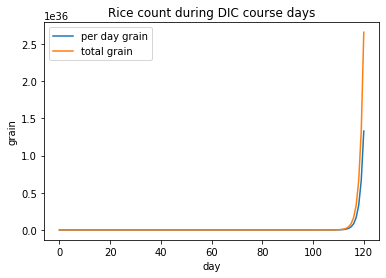

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Rice count during DIC course days" )
plt.xlabel("day")
plt.ylabel("grain")
plt.plot(list_n_grains, label="per day grain") 
plt.plot(list_total_grains, label="total grain")
plt.legend()
plt.show()

## 【問題3】何人が何日生活できる米か
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

一人あたりのお米の消費量は年間57kg  
年間57kg / 365日 = 156g  
https://www.gohanmuseum.com/consumption.html  

米粒1粒あたりの重さ  
茶碗一杯 = 65g = 3,250粒 : 1粒 = 0.02g  
https://www.maff.go.jp/j/heya/sodan/1806/03.html

1日に必要な米粒の数  
156g / 0.02g = 7800粒  

以上から、1日に必要な米粒の数は7800粒と想定します。

In [50]:
def needs_rice(n_grains, member):
    # 一人あたり1日で必要な米粒の数
    NEED_RICE = 7800

    # 1日に必要な米粒の数
    need_day_rice = NEED_RICE * member
    
    days = n_grains // need_day_rice
    return days

dic_member = 12 # 受講生12人
rice = list_total_grains[-1] # コース受講期間中にもらえる米粒
days = needs_rice(rice,dic_member)
print("DICの受講生{}人です。\nコース受講期間中にもらえる米粒は{}個で、\n{}日の生活が可能です。".format(dic_member, list_total_grains[-1], days))

DICの受講生12人です。
コース受講期間中にもらえる米粒は2658455991569831745807614120560689151個で、
28402307602241792156064253424793日の生活が可能です。
